## Observations and Insights 

<p>3 Obervations of the data:</p>
<ul>
    <li>As time went on for Mouse s185, the tumour shrank in volume.  We can infer that Capomulin was an effective treatment for this mouse. (*See line plot)</li>
    <li>Of the 4 regimens scrutinized, Capomulin and Ramicane had acheived lower tumour volumes than Infubinol and Ceftamin (*See box plot) and merrit further study. They also had the highest Timepoint counts.</li>
    <li>There is a positive correlation between the weight and tumour size - 0.84 (*see correlation and regression section).  This means that as a mouse's weight goes up, so does the tumour size. This could denote that keeping the mouse's weight down will help keep the tumour volume down as well. </li>
</ul>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].nunique(), merged_df['Mouse ID'].nunique()

(249, 249)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df['Mouse ID'][merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df['Mouse ID']=='g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
duplicates_df = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_cleaned_study_data_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
merged_cleaned_study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
merged_cleaned_study_data_df.shape, merged_cleaned_study_data_df['Mouse ID'].nunique()

((1888, 8), 249)

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
data_mean = merged_cleaned_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
data_median = merged_cleaned_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
data_variance = merged_cleaned_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
data_std = merged_cleaned_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
data_sem = merged_cleaned_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean":data_mean,
                          "Median":data_median,
                          "Variance":data_variance,
                          "Standard Deviation":data_std,
                          "SEM":data_sem})
# View the dataframe
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
merged_cleaned_study_data_df.groupby('Drug Regimen').agg(
    {
       "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]
    }
)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Count of Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timeopint'>

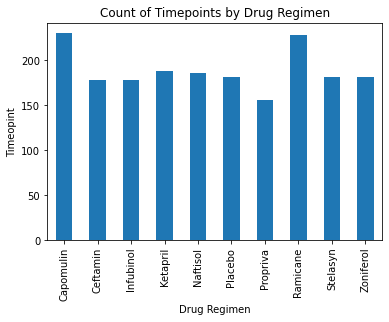

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create a grouped resultset for the timepoint counts by drug regimen
count_timepoints_drugreg = merged_cleaned_study_data_df.groupby('Drug Regimen')['Timepoint'].count()

# Plot with a bar chart
count_timepoints_drugreg.plot.bar(x='Drug Regimen', 
                                  y='Timepoint', 
                                  xlabel='Drug Regimen',
                                  ylabel='Timeopint',
                                  title='Count of Timepoints by Drug Regimen')

Text(0.5, 1.0, 'Count of Timepoints by Drug Regimen')

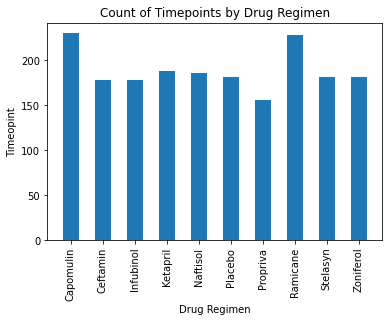

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# turn the groupby object from the previous step into a normal dataframe to make it easier to reference
count_timepoints_drugreg_df = count_timepoints_drugreg.to_frame()

# plot the data using pyplot
plt.bar(count_timepoints_drugreg_df.index, count_timepoints_drugreg_df['Timepoint'], width=.5)
plt.xticks(rotation=90)

# label it
plt.xlabel('Drug Regimen')
plt.ylabel('Timeopint')
plt.title('Count of Timepoints by Drug Regimen')


Text(0, 0.5, '')

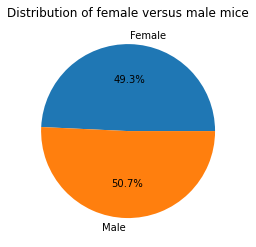

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_mice_bysex = merged_cleaned_study_data_df.groupby('Sex')['Mouse ID'].count()
count_mice_bysex.plot.pie(title="Distribution of female versus male mice", autopct='%1.1f%%')
plt.ylabel('')


Text(0.5, 1.0, 'Distribution of female versus male mice')

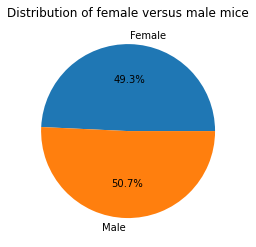

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_mice_bysex, autopct='%1.1f%%', labels=count_mice_bysex.index)
plt.title('Distribution of female versus male mice')

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints_df = merged_cleaned_study_data_df.groupby('Mouse ID')['Timepoint'].max() #['Tumor Volume (mm3)']
max_timepoints_df


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoints_df, merged_cleaned_study_data_df, how='left', on=['Mouse ID', 'Timepoint'])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
drug_regimen_filtered_df = merged_df.loc[(merged_df['Drug Regimen']=='Capomulin') 
                                         | (merged_df['Drug Regimen']=='Ramicane') 
                                         | (merged_df['Drug Regimen']=='Infubinol') 
                                         | (merged_df['Drug Regimen']=='Ceftamin')]

drug_regimen_filtered_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Function to take in a regimen, its upper and lower bounds to then return a dataframe of any potential outliers
def getOutliers(regimen, upperBound, lowerBound):
    outliers = drug_regimen_filtered_df.loc[(drug_regimen_filtered_df['Drug Regimen']==regimen)].copy()   
    outliers.drop(outliers[(outliers['Tumor Volume (mm3)'] <= upperBound) & (outliers['Tumor Volume (mm3)'] >= lowerBound)].index, inplace=True)    
    return outliers

# Function to take in a regimen and calculate all quartile data, then report on it and outlier data
def buildQuartileData(regimen):

    # Calculate the IQR and quantitatively determine if there are any potential outliers.    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = drug_regimen_filtered_df.loc[(drug_regimen_filtered_df['Drug Regimen']==regimen)]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f'{regimen}\n')
    print(f"The lower quartile of {regimen} treated tumor volumes is: {lowerq}")
    print(f"The upper quartile of {regimen} treated tumor volumes is: {upperq}")
    print(f"The IQR of {regimen} treated tumor volumes is: {iqr}")
    print(f"The median of {regimen} treated tumor volumes is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print('\n')
    print(f"Values below {lower_bound} for {regimen} could be outliers.")
    print(f"Values above {upper_bound} for {regimen} could be outliers.")
    
    outliers_df = getOutliers(regimen, upper_bound, lower_bound)
    
    if outliers_df.empty:
        print('\n')
        print(f'**No outliers were found for {regimen} treated tumours**')        
    else:
        print('\n')
        print(f'**Based on the upper and lower bounds of {upper_bound} and {lower_bound},\nthe following values are possible outliers for {regimen} treated tumours:')
        for index, row in outliers_df.iterrows():
            print(row['Tumor Volume (mm3)'])
    
    print('\n=========================================================================\n')
    
[buildQuartileData(r) for r in regimens_list]




    

Capomulin

The lower quartile of Capomulin treated tumor volumes is: 32.37735684
The upper quartile of Capomulin treated tumor volumes is: 40.1592203
The IQR of Capomulin treated tumor volumes is: 7.781863460000004
The median of Capomulin treated tumor volumes is: 38.1251644 


Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.


**No outliers were found for Capomulin treated tumours**


Ramicane

The lower quartile of Ramicane treated tumor volumes is: 31.56046955
The upper quartile of Ramicane treated tumor volumes is: 40.65900627
The IQR of Ramicane treated tumor volumes is: 9.098536719999998
The median of Ramicane treated tumor volumes is: 36.56165229 


Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.


**No outliers were found for Ramicane treated tumours**


Infubinol

The lower quartile of Infubinol treated tumor volumes is: 54.04860769


[None, None, None, None]

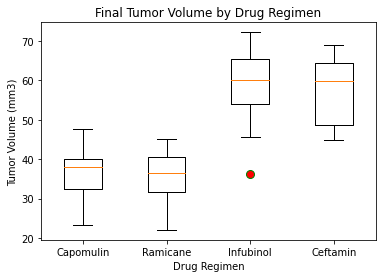

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create list and fill with tumor vol data (for plotting)
tumor_vol_list = [drug_regimen_filtered_df.loc[(drug_regimen_filtered_df['Drug Regimen']==r)]['Tumor Volume (mm3)'] for r in regimens_list]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none', markeredgecolor='g')
ax1.boxplot(tumor_vol_list, flierprops=flierprops )
plt.xticks([1,2,3,4], regimens_list)
plt.show() 


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

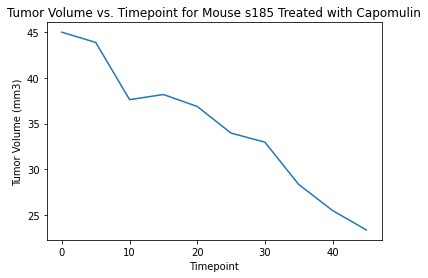

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_line_s185_df = merged_cleaned_study_data_df.loc[(merged_cleaned_study_data_df['Mouse ID']=='s185')]
#Capomulin_line_s185_df

x_axis = Capomulin_line_s185_df['Timepoint']
y_axis = Capomulin_line_s185_df['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.title('Tumor Volume vs. Timepoint for Mouse s185 Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Avg. Tumor Volume (mm3)')

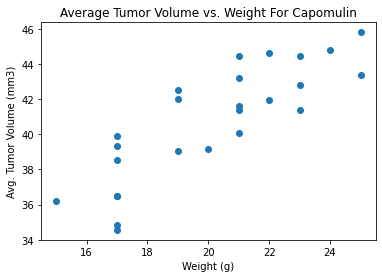

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = merged_cleaned_study_data_df.loc[(merged_cleaned_study_data_df['Drug Regimen']=='Capomulin')]
Capomulin_avg_df = Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(Capomulin_avg_df['Weight (g)'], Capomulin_avg_df['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Weight For Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_avg_df['Weight (g)'], Capomulin_avg_df['Tumor Volume (mm3)'])
print(f"The correlation between the mouse weight and average tumor volume is: {round(correlation[0],2)}")

The correlation between the mouse weight and average tumor volume is: 0.84


Text(0, 0.5, 'Avg. Tumor Volume (mm3)')

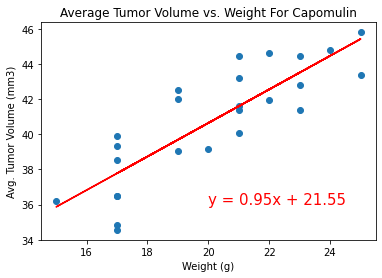

In [24]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_avg_df['Weight (g)'], Capomulin_avg_df['Tumor Volume (mm3)'])
regress_values = Capomulin_avg_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Capomulin_avg_df['Weight (g)'], Capomulin_avg_df['Tumor Volume (mm3)'])
plt.plot(Capomulin_avg_df['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Average Tumor Volume vs. Weight For Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')